## 프로젝트 명   " 쿠폰과 매출액은 어떠한 영향을 주나? "


<프로젝트 개요>


1.연구자 : 장민지

2.기간   : 23.10.05.

3.목적  :

쿠폰 할인 및 쿠폰과 매치된 할인이 매출액에 어떠한 영향을 주는가?

4.방법론

EDA > 데이터 전처리 > 선형회귀 분석을 통한 영향도 파악

5.가설

첫번째 가설 : 매출액에 따른 고객의 특성은 어떠한가?

  -> 결측치가 많기 때문에 지도학습을 고려해서 모델링 학습 불가 판단.

두번째 가설  :

  -> 그렇다면, 결측치가 최대한 적게 있는 컬럼 중에서
     
     어떠한 컬럼(X)를 선택할 것인가? 왜 선택한 것인가?

6.결과

  쿠폰 할인은 매출액을 약 1.79단위 감소시키는 반면,
  
  쿠폰과 매치된 할인은 매출액을 약 2.40단위 증가시킨다.

7.주요 성과

  쿠폰 관련 할인 전략이 매출액에 어떠한 영향을 주는지 파악할 수 있었다.

8.개선방안

  - 쿠폰 할인의 부정적 영향을 줄이기 위한 전략이 필요하다.

    : 쿠폰 할인 전략이 쿠폰 매치 할인 전략보다 매출액이 감소되므로
      ROI(Return on Investment)향상을 위해 새로운 쿠폰 마케팅 전략 필요

  - 만약 실제 비즈니스에 적용시 쿠폰과 매치된 할인의 효과를 극대화하는
    캠페인이 필요하다

    : 매치된 할인이 매출액 증대에 기여하므로, 더욱 활용하는 방안 모색

  - 여러 알고리즘을 통해 다양한 모델링을 시도하고 가장 최적의 모델을
    선택해야 예측 정확도를 높임

  - 전처리 스케일링 및 모델링 피쳐 스케일링 필요

    : 데이터 스케일이 다를 경우, 모델의 학습 및 예측 정확도가 떨어짐.

      Min-Max 스케일링, 경사 하강법

  - 피쳐 엔지니어링 필요
     
     -새로운 피처를 생성하여 모델의 성능을 향상

     -범주형 변수 인코딩: 원-핫 인코딩, 레이블 인코딩 등을 사용하여 범주형 변수를 수치형 변수로 변환합니다.

  - 하이퍼파라미터 조정 필요

   : 모델의 성능은 하이퍼파라미터에 크게 의존하므로, 최적의 값으로 조정 필요

    * 정규화 (Regularization): 선형 회귀에는 L1 규제 (Lasso 회귀)와 L2 규제 (Ridge 회귀)

    * 학습률 (Learning Rate): 경사 하강법(Gradient Descent)을 사용하여 선형 회귀 모델을 학습시킬 때 학습률을 조정


  - 모델 선정 기준이 필요

   : 다양한 모델 중 어떤 모델이 최적인지 판단하기 위한 명확한 기준과 설명이 필요

  -모델의 성능 지표 필요

    *교차 검증(Cross-validation)

7.기대효과

  - 쿠폰 할인 전략의 수정을 통해 더 효율적인 매출 증대 전략을 세울
    수 있는 참고 자료가 될 수 있다.

# 파일 불러오기


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# 파일 경로 설정
file_path_1 = "/content/drive/MyDrive/Colab Notebooks/비즈니스애널리닉스/transaction_data.csv"
file_path_2 = "/content/drive/MyDrive/Colab Notebooks/비즈니스애널리닉스/hh_demographic.csv"

# pandas로 CSV 파일 읽기
df_1 = pd.read_csv(file_path_1)
df_2 = pd.read_csv(file_path_2)


In [ ]:
# 데이터 확인
df_1.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1.0,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1.0,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1.0,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1.0,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1.0,0.0,0.0


In [ ]:
df_2.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


# 데이터 프레임 병합
-병합 기준: 두 파일의 같은 열이 없고, 같은 행(인덱스 번호)가 있기 때문에 가로로 병합
-concat() :
 - 주로 리스트 형태의 여러 DataFrame이나 Series를 입력으로 받아
   지정된 축(axis)을 기준으로 병합
 - 기본적으로 axis = 0 으로 설정되있고, 행으로 결합
 - axis = 1 은 열로 결합
 - keys 인자를 사용하여 각각의 DataFrame 혹은 Series에 레이블을 할당할
   수 있음

In [ ]:
merged_df = pd.concat([df_1, df_2], axis=1)

In [ ]:
print(merged_df.head())

   household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0           2375  26984851472    1     1004906         1         1.39   
1           2375  26984851472    1     1033142         1         0.82   
2           2375  26984851472    1     1036325         1         0.99   
3           2375  26984851472    1     1082185         1         1.21   
4           2375  26984851472    1     8160430         1         1.50   

   STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  COUPON_MATCH_DISC  \
0       364        -0.60        1631      1.0          0.0                0.0   
1       364         0.00        1631      1.0          0.0                0.0   
2       364        -0.30        1631      1.0          0.0                0.0   
3       364         0.00        1631      1.0          0.0                0.0   
4       364        -0.39        1631      1.0          0.0                0.0   

  AGE_DESC MARITAL_STATUS_CODE INCOME_DESC HOMEOWNER_DESC      HH_COMP_DES

# EDA : Y값(매출액)

*EDA를 통한 기본적인 목표

가. 데이터의 분포 파악
  - 각 특성의 분포를 시각화하거나 기술통계량을 통해 분포를 파악
    (본 프로젝트에선 매출액의 중앙값, 평균, 분위수, 데이터 중심의 경향성으로 대략적인 매출 범위 파악)
  + 중앙값(Medaian)
    - 중앙에 위치하는 값으로 이상치가 없으면 안정적인 중심 경향성을 보임
  + 평균(Mean)
    - 데이터의 총합을 개수로 나눈 값
    - 중심 경향성이 있으나 이상치에 매우 민감
    - 평균과 중앙값이 크게 다른 경우, 데이터의 이상치가 있거나 데이터
      분포가 치우쳐 있을 확률이 높음
  + 4분위수(Quantiles)
    - 제 1 사분위수( 데이터 하위 25%이하)
    - 제 3 사분위수 ( 데이터 상위 25% 나눈값)
    - 이상치 탐지 기준
      하한 : Q1 - 1.5 * IQR
      상한 : Q3 + 1.5 * IQR
      IQR = Q3 - Q1
나. 이상치 탐지
  - 박스플롯, 히스토그램 등 사용하여 이상치를 탐지하고 처리 방법 결정
  
    ( 분포를 도식화하여 파악하고, 필요한 경우 다른 열과의 관계를 시각화)
  + 박스플롯
    - 데이터의 중앙값, 사분위수, 이상치를 시각적으로 표현 가능
    - 박스의 중간 라인은 중앙값을 나타냄
    - 박스 상단과 하단은 각각 Q3와 Q1을 나타냄

다. 결측치 확인
  - 결측치의 유무와 그 비율을 파악하여, 적절한 전처리 전략을 세움
라. 타켓 변수의 특성 파악
  - 예측하려는 타켓 변수(이 프로젝트에서는 매출)의 분포와 특성을 파악한다.

In [ ]:
# 매출액의 기본 통계량 출력
print("중앙값 (Median) of SALES_VALUE:", merged_df["SALES_VALUE"].median())

중앙값 (Median) of SALES_VALUE: 2.0


In [ ]:
print("평균 (Mean) of SALES_VALUE:", merged_df["SALES_VALUE"].mean())

평균 (Mean) of SALES_VALUE: 2.9942982793133437


In [ ]:
print("\n분위수 (Quantiles) of SALES_VALUE:\n", merged_df["SALES_VALUE"].quantile([0.25, 0.5, 0.75]))


분위수 (Quantiles) of SALES_VALUE:
 0.25    1.29
0.50    2.00
0.75    3.49
Name: SALES_VALUE, dtype: float64


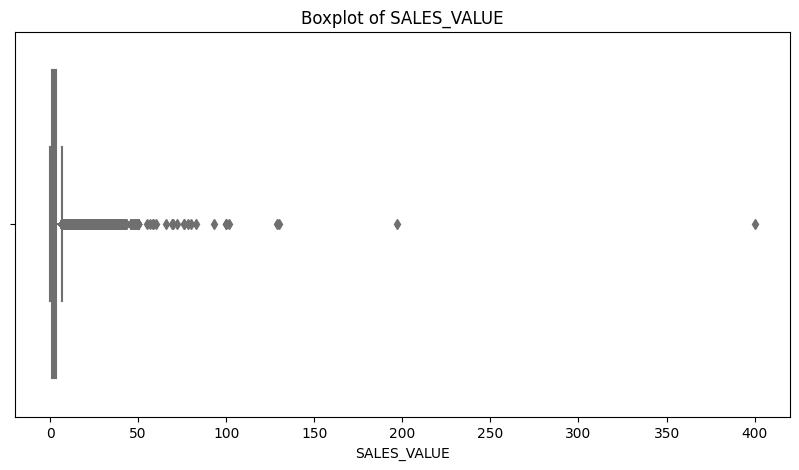

In [ ]:
# 박스플롯
plt.figure(figsize=(10, 5))
sns.boxplot(x=merged_df["SALES_VALUE"], color="skyblue")
plt.title("Boxplot of SALES_VALUE")
plt.show()

**+ 박스플롯으로 시각화 해 본 결과, 달러는 소수점으로 표시하기 때문에 0에 가까운 분포를 보인다. 그래서 로그 변환을 사용하여 큰 값을 줄이고 작은 값을 확장시켜 분포를 더 균일화 시킨다.**

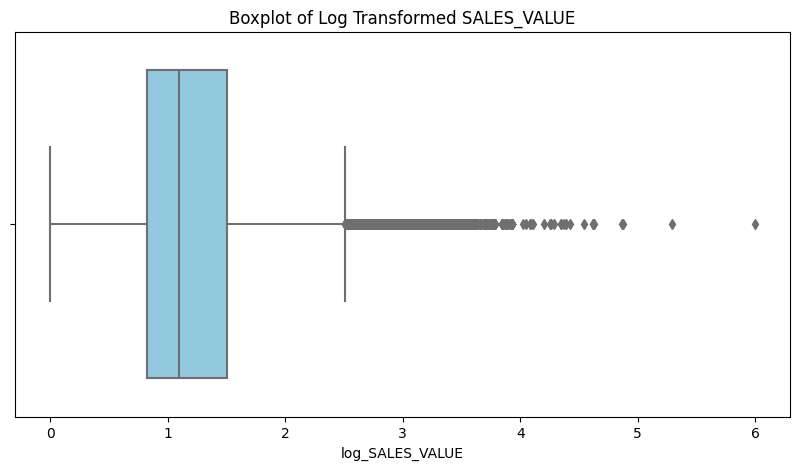

In [ ]:
# 로그 변환
merged_df['log_SALES_VALUE'] = np.log1p(merged_df['SALES_VALUE'])   #이 함수는 데이터에 1을 더한 후 로그 변환 수행

# 로그 변환된 값의 박스플롯
plt.figure(figsize=(10, 5))
sns.boxplot(x=merged_df['log_SALES_VALUE'], color="skyblue")
plt.title("Boxplot of Log Transformed SALES_VALUE")
plt.show()


In [ ]:
# 기술 통계
print(merged_df["SALES_VALUE"].describe())

count    98914.000000
mean         2.994298
std          3.650864
min          0.000000
25%          1.290000
50%          2.000000
75%          3.490000
max        400.000000
Name: SALES_VALUE, dtype: float64


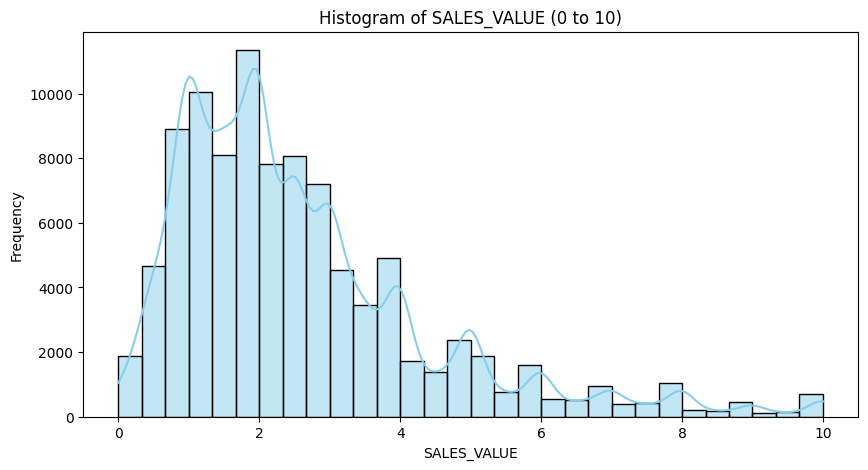

In [ ]:
# 0~10 범위의 히스토그램
plt.figure(figsize=(10, 5))
sns.histplot(merged_df[merged_df["SALES_VALUE"] <= 10]["SALES_VALUE"], bins=30, kde=True, color="skyblue")
plt.title("Histogram of SALES_VALUE (0 to 10)")
plt.xlabel("SALES_VALUE")
plt.ylabel("Frequency")
plt.show()

-98,914개의 데이터 포인트가 있고 98,914개의 관측치가 있음

-평균 : 평균매출액은 2,9943

-표준편차는 약 3,6509이며, 데이터의 산포도,

 즉 대략적인 데이터의 분산을 나타낸다.

 표준편차가 작으면 대부분의 데이터 값들이 평균 근처에 몰려있고,

 표준편차가 크게 평균에서 멀리 떨어졌는데 평균 2.9943에서

 대략 +- 3.6509 달러 범위 내를 분포해있음을 확인했다.

-최소 매출액은 0이다.

-1사분위수는 1.29달러, 2사분위수는 2달러, 3사분위수는 3.49 달러

-최대 매출액은 400달러다.

-대부분 평균에 웃도는 값이지만,
 최대 매출액은 400달러이기에 아웃라이어 라고 볼 수 있다.

-평균 3.6509가 2사분위수 2달러 보다 크기 때문에 약간 오른쪽으로 치우쳐
 있다. 이는 아웃라이어의 영향이 들어가 있음을 알 수 있다.
 또한 제품들이 주로 저렴한 항목임을 알 수 있었고, 특정 고객, 특정 상황에 따라 매출의 변동을 추론할 수 있다.

In [ ]:
#범주형 변수 확인
print(merged_df['SALES_VALUE'].value_counts().head(10)) # 상위 10개의 매출액 값과 그 빈도를 출력

2.00    4501
1.00    4049
2.50    3970
2.99    3549
1.99    3538
0.99    3507
1.50    2934
3.99    2645
3.00    1605
1.29    1571
Name: SALES_VALUE, dtype: int64


모든 값들이 정수라는 것은 실제 매출액 데이터가 소수점 없이 정수로 기록되었다는 것을 의미한다. 이 부분에서 반올림되었거나, 소수점 아래정보가 누락됬음을 확인할 수 있다.

In [ ]:
# 결측치 확인
missing_values = merged_df['SALES_VALUE'].isnull().sum()
print(f'결측치 개수: {missing_values}')

결측치 개수: 0


결측치가 없으므로 데이터가 안전하며, 처리할 필요가 없다.

# EDA : X값이 매출액에 영향을 미칠까?

- 연속형과 범주형 변수들을 나눠서 카테고리별 빈도를 히스토그램으로 확인해야 나중에 모델링을 무엇을 할지 고민을 하는데, 여기서는 먼저 범주형 변수를 고려해봤다. (why? 범주형이여도 정수로 변환할 수 있을까? 정수로 변환한다면 어떤 모델링에 최적화될까? )

In [ ]:
# 범주형 변수의 카테고리별 빈도 확인

categorical_columns = merged_df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f'\nFrequency count for column: {col}')
    print(merged_df[col].value_counts())



Frequency count for column: AGE_DESC
45-54    288
35-44    194
25-34    142
65+       72
55-64     59
19-24     46
Name: AGE_DESC, dtype: int64

Frequency count for column: MARITAL_STATUS_CODE
U    344
A    340
B    117
Name: MARITAL_STATUS_CODE, dtype: int64

Frequency count for column: INCOME_DESC
50-74K       192
35-49K       172
75-99K        96
25-34K        77
15-24K        74
Under 15K     61
125-149K      38
100-124K      34
150-174K      30
250K+         11
175-199K      11
200-249K       5
Name: INCOME_DESC, dtype: int64

Frequency count for column: HOMEOWNER_DESC
Homeowner          504
Unknown            233
Renter              42
Probable Renter     11
Probable Owner      11
Name: HOMEOWNER_DESC, dtype: int64

Frequency count for column: HH_COMP_DESC
2 Adults No Kids    255
2 Adults Kids       187
Single Female       144
Single Male          95
Unknown              73
1 Adult Kids         47
Name: HH_COMP_DESC, dtype: int64

Frequency count for column: HOUSEHOLD_SIZE_DESC


가.AGE_DESC (나이 구간):

45-54세 구간이 가장 많은 빈도를 가지며, 288회로 기록.
그 다음으로 35-44세 구간, 25-34세 구간 순으로 빈도가 높다.
19-24세 및 65세 이상 구간은 상대적으로 빈도가 낮다.

나.MARITAL_STATUS_CODE (결혼 상태 코드):

'U'와 'A'는 매우 비슷한 빈도를 가지며 각각 344회와 340회로 기록.
'B'는 117회로 상대적으로 낮은 빈도를 보인다.

다.INCOME_DESC (소득 구간):

50-74K 구간과 35-49K 구간이 빈도가 가장 높다.
200K 이상의 소득 구간은 상대적으로 매우 낮은 빈도를 가진다.

라.HOMEOWNER_DESC (주택 소유 상태):

대다수의 사람들이 'Homeowner'로 분류된다.
'Unknown' 카테고리도 상당한 빈도를 가지나, 나머지 카테고리들은 상대적으로 빈도가 적다.

마.HH_COMP_DESC (가구 구성):

가장 많은 가구는 '2 Adults No Kids'로 구성되어 있습니다.
'1 Adult Kids'와 'Unknown'은 상대적으로 낮은 빈도를 가진다.

바. HOUSEHOLD_SIZE_DESC (가구 규모):

대부분의 가구는 1인 또는 2인 가구입니다.
5인 이상의 큰 가구는 상대적으로 적은 빈도를 보인다.

사.KID_CATEGORY_DESC (아이 수):

대다수의 가구에서 아이의 수는 'None/Unknown'으로 기록되어 있다.
3명 이상의 아이를 가진 가구는 69회로 상대적으로 적다.

In [ ]:
print(merged_df['KID_CATEGORY_DESC'].value_counts())


None/Unknown    558
1               114
3+               69
2                60
Name: KID_CATEGORY_DESC, dtype: int64


**너무 작은 데이터 수로 인해 모델링 시 학습이 안 될 위험이 있음**

In [ ]:
# 가구 구성의 빈도수 확인
print(merged_df['HH_COMP_DESC'].value_counts())

2 Adults No Kids    255
2 Adults Kids       187
Single Female       144
Single Male          95
Unknown              73
1 Adult Kids         47
Name: HH_COMP_DESC, dtype: int64


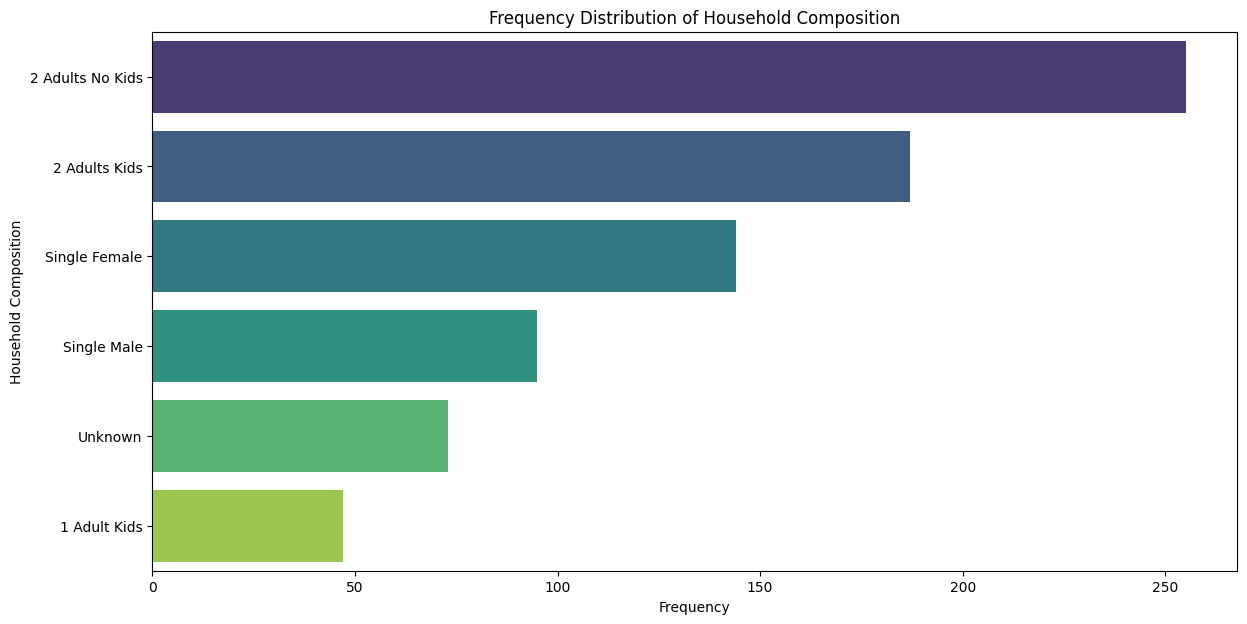

In [ ]:
# 가구 구성의 빈도수 시각화
plt.figure(figsize=(14, 7))
sns.countplot(data=merged_df, y='HH_COMP_DESC', order=merged_df['HH_COMP_DESC'].value_counts().index, palette='viridis')
plt.title('Frequency Distribution of Household Composition')
plt.xlabel('Frequency')
plt.ylabel('Household Composition')
plt.show()

2 Adults no kids가 가장 높은 값을 보임.
unknown은 삭제 필요

<ipython-input-20-b4fe4581ce20>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(data=merged_df, y='HH_COMP_DESC', x='SALES_VALUE', order=merged_df.groupby('HH_COMP_DESC').mean()['SALES_VALUE'].sort_values(ascending=False).index, palette='viridis')


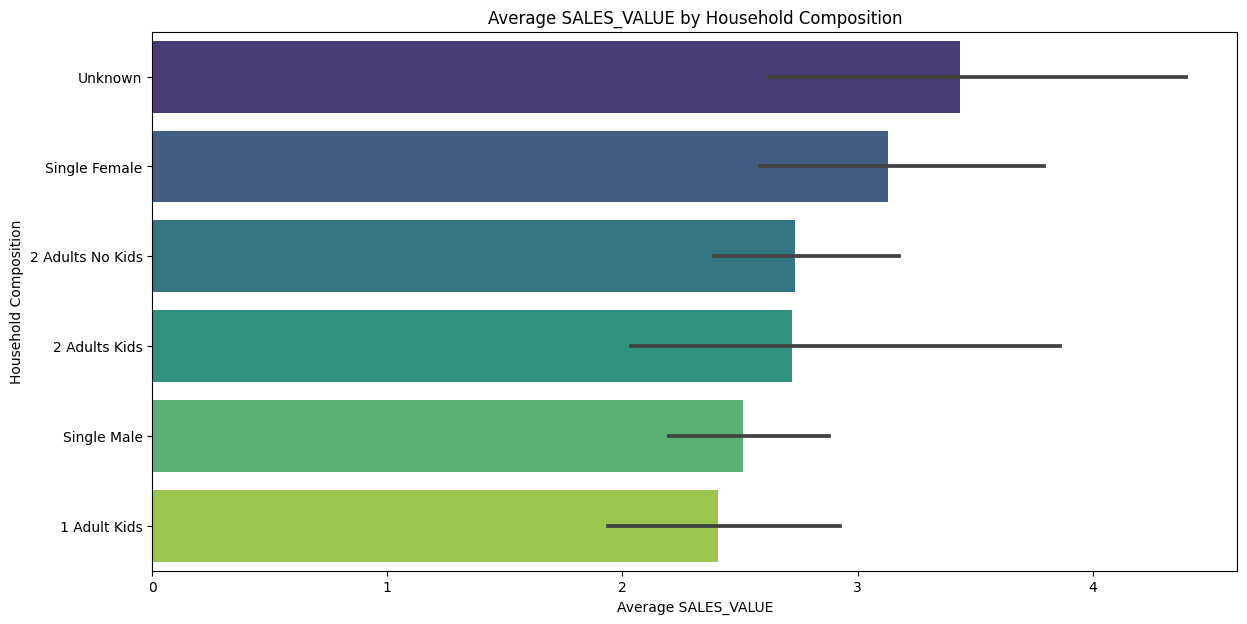

In [ ]:
# 가구 구성별 평균 매출액 시각화
plt.figure(figsize=(14, 7))
sns.barplot(data=merged_df, y='HH_COMP_DESC', x='SALES_VALUE', order=merged_df.groupby('HH_COMP_DESC').mean()['SALES_VALUE'].sort_values(ascending=False).index, palette='viridis')
plt.title('Average SALES_VALUE by Household Composition')
plt.xlabel('Average SALES_VALUE')
plt.ylabel('Household Composition')
plt.show()


<ipython-input-21-d0b699359fac>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.boxplot(data=merged_df, y='HH_COMP_DESC', x='log_SALES_VALUE', order=merged_df.groupby('HH_COMP_DESC').median()['log_SALES_VALUE'].sort_values(ascending=False).index, palette='viridis')


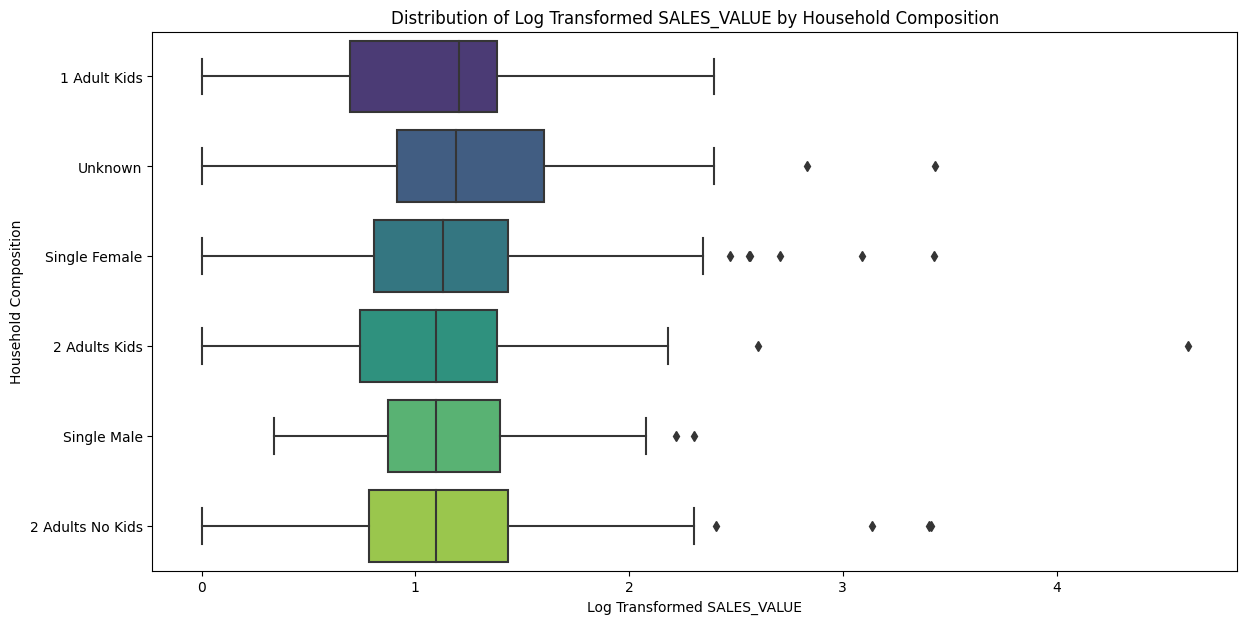

In [ ]:
# 가구 구성별 매출액의 분포 시각화

# SALES_VALUE의 로그 변환
merged_df['log_SALES_VALUE'] = np.log1p(merged_df['SALES_VALUE'])

# 로그 변환된 SALES_VALUE를 사용해 가구 구성별 매출액의 분포 시각화
plt.figure(figsize=(14, 7))
sns.boxplot(data=merged_df, y='HH_COMP_DESC', x='log_SALES_VALUE', order=merged_df.groupby('HH_COMP_DESC').median()['log_SALES_VALUE'].sort_values(ascending=False).index, palette='viridis')
plt.title('Distribution of Log Transformed SALES_VALUE by Household Composition')
plt.xlabel('Log Transformed SALES_VALUE')
plt.ylabel('Household Composition')
plt.show()

박스플롯을 살펴볼 때

1) 박스의 중앙선 2) 박스의 상하단 3) 수염의 상태를 확인 할 수 있다.
(참고: 수염은 일반적으로 Q1 - 1.5 * IQR부터 Q3 + 1.5 * IQR 범위)

이 때 데이터의 중앙값은 1 사분위수를 조금 넘는 것으로 확인했고

전반적으로 어떤 가구 구성원이든 낮은 가격에 많이 지출함을 알 수 있었다.

그리고 데이터에 있는 큰 아웃라이어(위에서 본 400달러)가 모델에 성능을 영향을 줄 수 있으므로 제거한다.

물론 400달러가 비즈니스 목표에 따라 중요한 데이터인지 확인해야하나

이 프로젝트에서는 unknown이랑 400달러는 중앙값에 영향을 주기 때문에 삭제한다.

# **재 EDA : X 값 다시 선정하기 **

In [ ]:
merged_df.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,household_key,log_SALES_VALUE
count,98914.000000,9.891400e+04,98914.000000,9.891400e+04,98914.000000,98914.000000,98914.000000,98914.000000,98914.000000,98913.000000,98913.000000,98913.000000,801.000000,98914.000000
mean,1278.993641,2.757718e+10,50.171341,2.065392e+06,49.627151,2.994298,2343.740896,-0.562940,1593.688275,7.860898,-0.011588,-0.002128,1235.176030,1.209519
std,739.048692,2.465399e+08,20.489423,2.501565e+06,778.250526,3.650864,7571.956912,1.129611,408.559180,2.953431,0.176037,0.032536,736.804647,0.539154
min,1.000000,2.698485e+10,1.000000,2.669100e+04,0.000000,0.000000,1.000000,-38.970000,0.000000,1.000000,-16.990000,-2.700000,1.000000,0.000000
25%,637.000000,2.739862e+10,35.000000,9.094790e+05,1.000000,1.290000,324.000000,-0.790000,1326.000000,6.000000,0.000000,0.000000,596.000000,0.828552
50%,1260.000000,2.762012e+10,54.000000,1.013321e+06,1.000000,2.000000,367.000000,-0.130000,1633.000000,8.000000,0.000000,0.000000,1218.000000,1.098612
75%,1946.000000,2.778570e+10,68.000000,1.110112e+06,1.000000,3.490000,412.000000,0.000000,1909.000000,10.000000,0.000000,0.000000,1914.000000,1.501853
max,2499.000000,2.791328e+10,79.000000,1.036424e+07,39365.000000,400.000000,32004.000000,0.000000,2359.000000,12.000000,0.000000,0.000000,2499.000000,5.993961


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98914 entries, 0 to 98913
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   household_key        98914 non-null  int64  
 1   BASKET_ID            98914 non-null  int64  
 2   DAY                  98914 non-null  int64  
 3   PRODUCT_ID           98914 non-null  int64  
 4   QUANTITY             98914 non-null  int64  
 5   SALES_VALUE          98914 non-null  float64
 6   STORE_ID             98914 non-null  int64  
 7   RETAIL_DISC          98914 non-null  float64
 8   TRANS_TIME           98914 non-null  int64  
 9   WEEK_NO              98913 non-null  float64
 10  COUPON_DISC          98913 non-null  float64
 11  COUPON_MATCH_DISC    98913 non-null  float64
 12  AGE_DESC             801 non-null    object 
 13  MARITAL_STATUS_CODE  801 non-null    object 
 14  INCOME_DESC          801 non-null    object 
 15  HOMEOWNER_DESC       801 non-null   

In [ ]:
#결측치 확인
missing_values = merged_df.isnull().sum()
print(missing_values)

household_key              0
BASKET_ID                  0
DAY                        0
PRODUCT_ID                 0
QUANTITY                   0
SALES_VALUE                0
STORE_ID                   0
RETAIL_DISC                0
TRANS_TIME                 0
WEEK_NO                    1
COUPON_DISC                1
COUPON_MATCH_DISC          1
AGE_DESC               98113
MARITAL_STATUS_CODE    98113
INCOME_DESC            98113
HOMEOWNER_DESC         98113
HH_COMP_DESC           98113
HOUSEHOLD_SIZE_DESC    98113
KID_CATEGORY_DESC      98113
household_key          98113
log_SALES_VALUE            0
dtype: int64


98113개의 결측치는 너무 많기 때문에 모델링에 영향을 준다.

가능한 X 변수들:

DAY

PRODUCT_ID

QUANTITY

STORE_ID

RETAIL_DISC

TRANS_TIME

WEEK_NO (1개의 결측치 처리 필요)

COUPON_DISC (1개의 결측치 처리 필요)

COUPON_MATCH_DISC (1개의 결측치 처리 필요)

y 변수:

SALES_VALUE (평균을 기준으로 이진화)

**x 값은 아래와 같은 이유로 선정했다.**

COUPON_DISC:

이 열은 쿠폰 할인 금액을 나타냄.
예를 들면, 고객이 쿠폰을 사용하여 특정 제품에 대한 할인을 받았다면, 그 할인된 금액이 이 열에 기록. 이 값은 고객의 구매 결정에 쿠폰이 얼마나 영향을 미치는지 분석하는 데 도움이 될 수 있음

COUPON_MATCH_DISC:

이 열은 쿠폰과 매치된 할인 금액을 나타낼 수 있음. 예를 들면, 특정 프로모션에서 쿠폰과 다른 할인이 함께 적용되었을 때, 그 중 쿠폰에 해당하는 할인 금액만을 기록하는 열일 수 있음

# 데이터 전처리

- 로지스틱 회귀에 적합한 형태로 데이터를 준비 하기 위해 전처리를 시작한다. 전처리 : 아웃라이어처리, 결측치 처리, 변수 변환, 스케일링, 분석에 적합한 형태로 데이터 가공

In [ ]:
# 해당 열에서 결측치가 있는 행을 제거
merged_df = merged_df.dropna(subset=['COUPON_DISC', 'COUPON_MATCH_DISC'])

In [ ]:
# 원하는 열만 선택하여 다시 merged_df에 할당
merged_df = merged_df[['SALES_VALUE', 'COUPON_DISC', 'COUPON_MATCH_DISC']]

In [ ]:
print(merged_df.head())

   SALES_VALUE  COUPON_DISC  COUPON_MATCH_DISC
0         1.39          0.0                0.0
1         0.82          0.0                0.0
2         0.99          0.0                0.0
3         1.21          0.0                0.0
4         1.50          0.0                0.0


In [ ]:
# 데이터의 타입을 확인
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98913 entries, 0 to 98912
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SALES_VALUE        98913 non-null  float64
 1   COUPON_DISC        98913 non-null  float64
 2   COUPON_MATCH_DISC  98913 non-null  float64
dtypes: float64(3)
memory usage: 3.0 MB


- 인덱스: Int64Index를 사용하며, 0에서 98,912까지의 총 98,913개의 항목이 있습니다.

- 열의 수: 총 3개의 열이 있습니다.

- 각 열의 정보:

*SALES_VALUE: 결측치가 없으며 (non-null) 98,913개의 항목이 있고, 데이터 타입은 float64

*COUPON_DISC: 결측치가 없으며 (non-null) 98,913개의 항목이 있고, 데이터 타입은 float64

*COUPON_MATCH_DISC: 결측치가 없으며 (non-null) 98,913개의 항목이 있고, 데이터 타입은 float64

- 메모리 사용량: 데이터프레임은 약 3.0 MB의 메모리를 사용하고 있음.

# 모델링 : 선형회귀

: 적절한 알고리즘을 사용하여 데이터를 기반으로 모델을 학습시키는 과정,

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X = merged_df[['COUPON_DISC', 'COUPON_MATCH_DISC']]
y = merged_df['SALES_VALUE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 선형 회귀 모델 훈련
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 예측 수행
y_pred = lr.predict(X_test)

In [ ]:
# 모델의 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 11.27
Root Mean Squared Error: 3.36


- Mean Squared Error (MSE): 11.27

- MSE는 회귀 모델의 성능을 평가하기 위한 오차의 제곱의 평균이다.

  작을수록 예측이 실제 값에 더 가깝다는 것을 의미하는데, 여기서
  Root Mean Squared Error (RMSE): 3.36가 나왔다.

- RMSE는 MSE의 제곱근으로, 오차의 평균적인 크기를 나타냅다.

  이 값은 모델이 평균적으로 얼마나 정확하게 예측하는지를 보여주는 지표로 사용되는데 작을수록 높은 정확도를 보인다.

- 해당 결과에서 RMSE 값은 3.36이다.

  이는 모델이 예측한 SALES_VALUE가 실제 값과 평균적으로 약 3.36
  단위만큼 차이가 난다는 것을 의미한다.

+ 판단 기준)

- 데이터의 SALES_VALUE의 스케일(분포 범위)과 비교하여 이 오차가 얼마나 큰지를 판단할 수 있어서 아래 기술 통계로 평균,중앙값,최소값,최대값을 다시 확인했다.



In [ ]:
merged_df['SALES_VALUE'].describe()

count    98913.000000
mean         2.994298
std          3.650882
min          0.000000
25%          1.290000
50%          2.000000
75%          3.490000
max        400.000000
Name: SALES_VALUE, dtype: float64

- SALES_VALUE의 count, mean, std, min, 25%, 50%, 75%, max 값들을 얻을 수 있는데,

- RMSE(3.36)를 위에서 얻은 SALES_VALUE의 통계 값과 비교하면 다음과 같다.

- 로지스틱 회귀는 평균적으로 약 3.36 단위만큼 예측에서 벗어난다고 한다.
(RMSE).

이는 평균값 2.9943에 비해서는 상대적으로 크지 않다.

중앙값(2.0000)에 비해서도 RMSE가 큰 편이다.

RMSE(3.36)는 표준편차(3.6509)와 유사하다.

이것은 모델이 데이터의 자연적인 편차와 유사한 정도의 오차로 예측한다는 것을 의미한다.

+ 모델링 결론:

모델의 RMSE 값은 SALES_VALUE의 평균 및 중앙값에 비해 크지 않지만

완벽하다고는 할 수 없다.

특히, 주어진 데이터의 표준편차와 거의 비슷하기 때문에,

모델이 예측하는 오차는 데이터의 자연적인 변동성과 유사한 수준임을 알 수 있었다.

# 모델 해석, 그리고 수치화

Q1. X는 Y에 왜, 어떠한 영향을 주는지, 그리고 그 영향의 정도는 어떠한가?

Q2 .모델은 목적에 맞게 활용하였는가?





(참고 : x 값은 아래와 같은 이유로 선정했다.


COUPON_DISC:

이 열은 쿠폰 할인 금액을 나타냄. 예를 들면, 고객이 쿠폰을 사용하여 특정 제품에 대한 할인을 받았다면, 그 할인된 금액이 이 열에 기록. 이 값은 고객의 구매 결정에 쿠폰이 얼마나 영향을 미치는지 분석하는 데 도움이 될 수 있음


COUPON_MATCH_DISC:

이 열은 쿠폰과 매치된 할인 금액을 나타낼 수 있음. 예를 들면, 특정 프로모션에서 쿠폰과 다른 할인이 함께 적용되었을 때, 그 중 쿠폰에 해당하는 할인 금액만을 기록하는 열일 수 있음 )

In [ ]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

                   Coefficient
COUPON_DISC          -1.791636
COUPON_MATCH_DISC     2.395181


선형회귀는 어떠한 영향을 주는지,

그 영향의 정도가 어떠한지 알기 위해 계수(Coefficient)와 가중치(Weight)를 사용하는데

x 값을 살펴보면,

쿠폰 할인 금액과 쿠폰과 매치된 할인 금액에 따라 y의 값이 변동되기 때문에

쿠폰 할인이 1단위 증가할 때, 매출액은 약 1.79달러가 감소하고

쿠폰과 매치된 할인이 1단위 증가할 때, 매출액은 2.39달러 증가한다.



# 모델 해석, 그리고 시각화

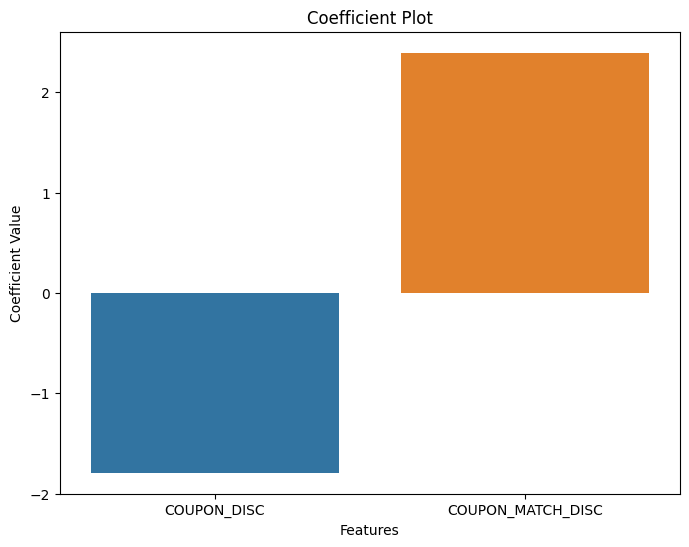

In [ ]:
# 계수 값을 데이터프레임으로 변환
coeff_df = pd.DataFrame(lr.coef_, ['COUPON_DISC', 'COUPON_MATCH_DISC'], columns=['Coefficient'])

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=coeff_df.index, y=coeff_df['Coefficient'])
plt.title('Coefficient Plot')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.show()